## Домашнее задание к лекции "Базовые понятия статистики"
Будем осуществлять работу с непростым набором данных о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

### Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [779]:
from re import search, split
with open('horse_data.names', 'r') as f:
    columns_all = []
    for line in f:
        if search("\d+:", line) != None:
            columns_all.append((split("\d+:", line)[1].strip(': \n')).lower())

In [780]:
columns_all

['surgery?',
 'age',
 'hospital number',
 'rectal temperature',
 'pulse',
 'respiratory rate',
 'temperature of extremities',
 'peripheral pulse',
 'mucous membranes',
 'capillary refill time',
 'pain',
 'peristalsis',
 'abdominal distension',
 'nasogastric tube',
 'nasogastric reflux',
 'nasogastric reflux ph',
 'rectal examination - feces',
 'abdomen',
 'packed cell volume',
 'total protein',
 'abdominocentesis appearance',
 'abdomcentesis total protein',
 'outcome',
 'surgical lesion?',
 'type of lesion_1',
 'type of lesion_2',
 'type of lesion_3',
 'cp_data']

In [781]:
columns_required = [
    "surgery?",                     #category
    "age",                          #category
    "rectal temperature",           #linear 
    "pulse",                        #linear
    "respiratory rate",             #linear
    "temperature of extremities",   #category
    "pain",                         #category
    "outcome"                       #category
]                      

In [782]:
import pandas as pd
import numpy as np
import seaborn as sns

In [783]:
df_horses = pd.read_csv('horse_data.csv', #файл в корне Jupyter Root
                        header=None, #заголовков нет
                        names=columns_all, #названия всех колонок
                        usecols=columns_required, #используемые колонки
                        na_values='?', #замена "?" на NaN
                        )
df_horses.head(5)

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


### Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [784]:
df_horses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [785]:
# оптимизация типов данных
df_horses.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    Int64  
 1   age                         300 non-null    Int64  
 2   rectal temperature          240 non-null    Float64
 3   pulse                       276 non-null    Int64  
 4   respiratory rate            242 non-null    Int64  
 5   temperature of extremities  244 non-null    Int64  
 6   pain                        245 non-null    Int64  
 7   outcome                     299 non-null    Int64  
dtypes: Float64(1), Int64(7)
memory usage: 21.2 KB


In [786]:
df_horses.isnull().sum()   #определение количества пропусков

surgery?                       1
age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
pain                          55
outcome                        1
dtype: int64

In [810]:
df_linear = df_horses[["rectal temperature", "pulse", "respiratory rate"]]
# df_category = df_horses[["surgery?", "age", "temperature of extremities", "pain", "outcome"]]

# linear. одномерный анализ

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

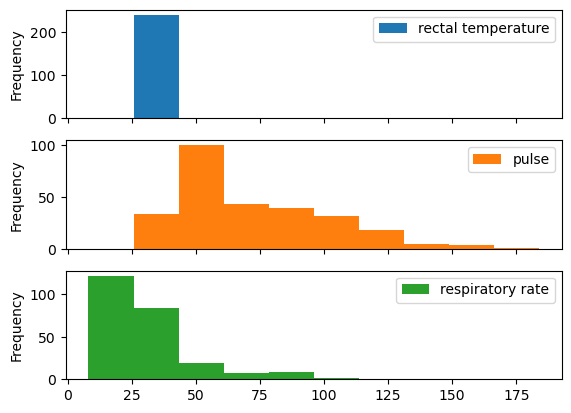

In [848]:
df_horses[["rectal temperature", "pulse", "respiratory rate"]]\
                            .plot(kind='hist', 
                                  subplots=True, 
                                  use_index=False)

In [850]:
def outlierless(df, series):
    """
    DOCSTRING: Exclusion of outliers from the dataframe by the IQR-method 
    INPUT: DataFrame, atribut 
    OUTPUT: describe().T initial df / describe().T outlierless df
    """
    q1 = df[series].quantile(.25)
    q3 = df[series].quantile(.75)
    iqr = (q3 - q1).round(2)
    lower_threshold = (q1 - 1.5 * iqr).round(2)
    upper_threshold = (q3 + 1.5 * iqr).round(2)
    outlierless_ = df[df[series].between(lower_threshold, upper_threshold)]
    return outlierless_

### Rectal temperature

<AxesSubplot:title={'center':'Hist of [Rectal temperature]'}, ylabel='Frequency'>

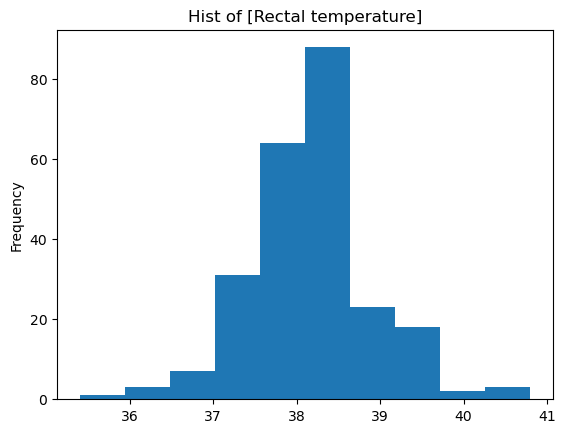

In [851]:
#Частотное распределение
df_horses['rectal temperature'].plot(kind='hist', 
                                     title='Hist of [Rectal temperature]')

<AxesSubplot:title={'center':'Boxplot of [Rectal temperature]'}>

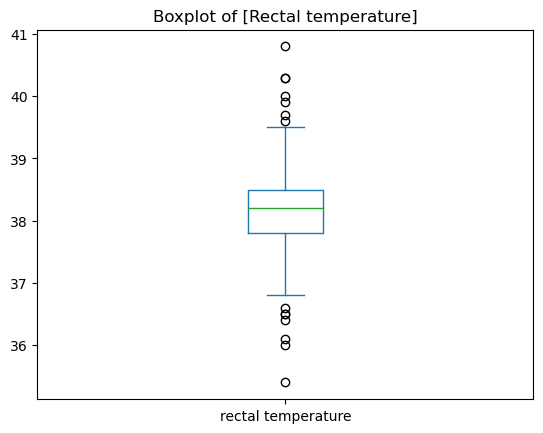

In [852]:
# посмотреть на выбросы
df_horses['rectal temperature'].plot(kind='box', 
                                     title='Boxplot of [Rectal temperature]')

In [853]:
#  4:  rectal temperature
#           - linear
#           - in degrees celsius.
#           - An elevated temp may occur due to infection.
#           - temperature may be reduced when the animal is in late shock
#           - normal temp is 37.8
#           - this parameter will usually change as the problem progresses
#                eg. may start out normal, then become elevated because of
#                    the lesion, passing back through the normal range as the
#                    horse goes into shock

In [854]:
# распределение близко к нормальному, применение оправдано
rt_outlierless = outlierless(df_linear, 'rectal temperature')

<AxesSubplot:title={'center':'Boxplot of [Rectal temperature] without outliers'}>

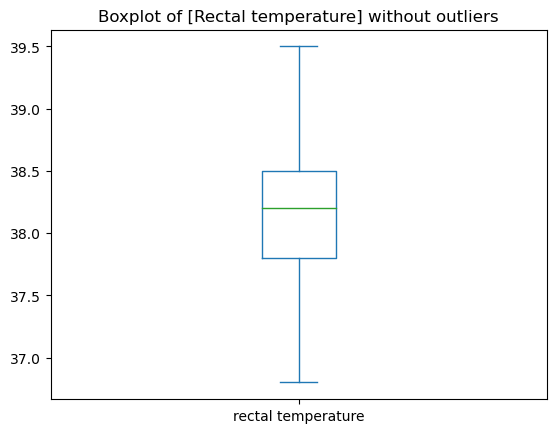

In [856]:
# выбросы исключены
rt_outlierless['rectal temperature'].plot(kind='box', 
                                          title='Boxplot of [Rectal temperature] without outliers')

In [857]:
# сравнить основные описательные статистики
pd.concat([df_linear['rectal temperature'].describe(), rt_outlierless['rectal temperature'].describe()], axis=1).T

,count,mean,std,min,25%,50%,75%,max
rectal temperature,240.0,38.167917,0.732289,35.4,37.8,38.2,38.5,40.8
rectal temperature,226.0,38.169027,0.571949,36.8,37.8,38.2,38.5,39.5


### Pulse

<AxesSubplot:title={'center':'Hist of [Pulse]'}, ylabel='Frequency'>

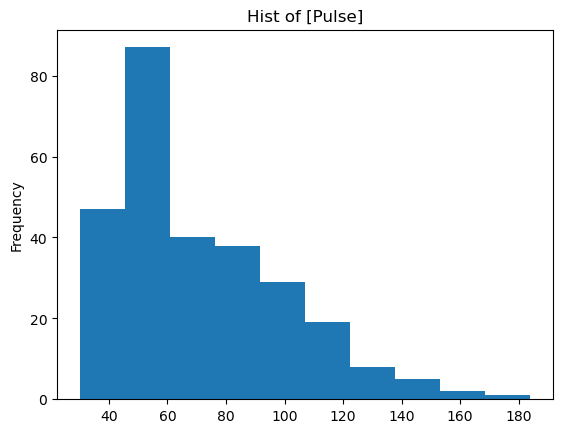

In [858]:
#Частотное распределение
df_horses['pulse'].plot(kind='hist', title='Hist of [Pulse]')

<AxesSubplot:title={'center':'Boxplot of [Pulse]'}>

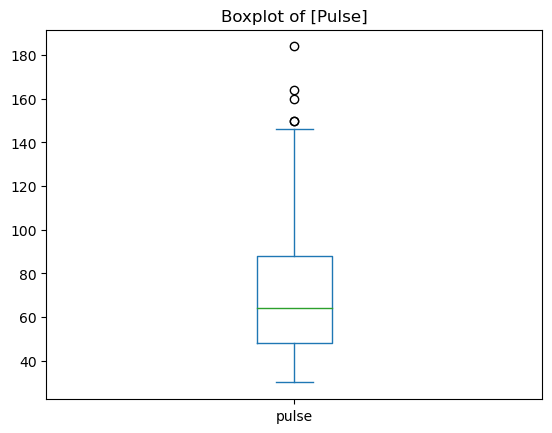

In [859]:
# посмотреть на выбросы
df_horses['pulse'].plot(kind='box', 
                        title='Boxplot of [Pulse]')

In [528]:
# 5:  pulse
#           - linear
#           - the heart rate in beats per minute
#           - is a reflection of the heart condition: 30 -40 is normal for adults
#           - rare to have a lower than normal rate although athletic horses
#             may have a rate of 20-25
#           - animals with painful lesions or suffering from circulatory shock
#             may have an elevated heart rate

In [860]:
# распределение не нормальное, удаление выбросов не оправдано (много значений исключается)
pulse_outlierless = outlierless(df_linear, 'pulse')

<AxesSubplot:title={'center':'Boxplot of [Pulse] without outliers'}>

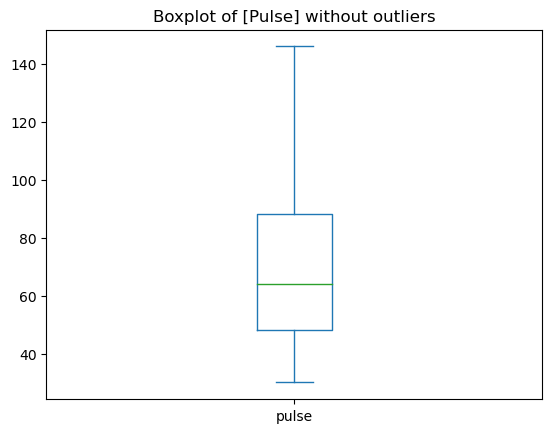

In [863]:
# выбросы исключены
pulse_outlierless['pulse'].plot(kind='box', 
                                title='Boxplot of [Pulse] without outliers')

In [864]:
# сравнить основные описательные статистики
pd.concat([df_linear['pulse'].describe(), pulse_outlierless['pulse'].describe()], axis=1).T

,count,mean,std,min,25%,50%,75%,max
pulse,276.0,71.913043,28.630557,30.0,48.0,64.0,88.0,184.0
pulse,271.0,70.258303,26.082484,30.0,48.0,64.0,88.0,146.0


### Respiratory rate

<AxesSubplot:title={'center':'Hist of [Respiratory rate]'}, ylabel='Frequency'>

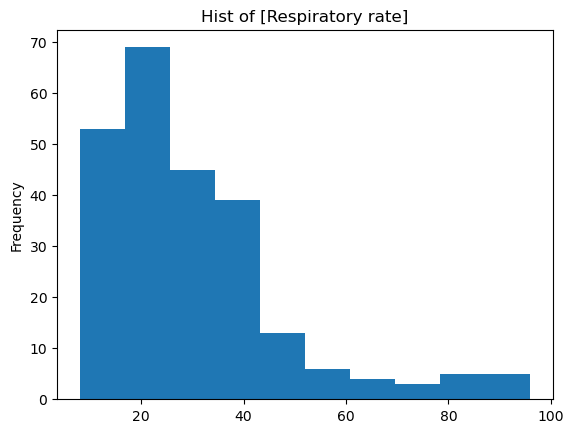

In [865]:
#Частотное распределение
df_horses['respiratory rate'].plot(kind='hist', 
                                   title='Hist of [Respiratory rate]')

<AxesSubplot:title={'center':'Boxplot of [Respiratory rate]'}>

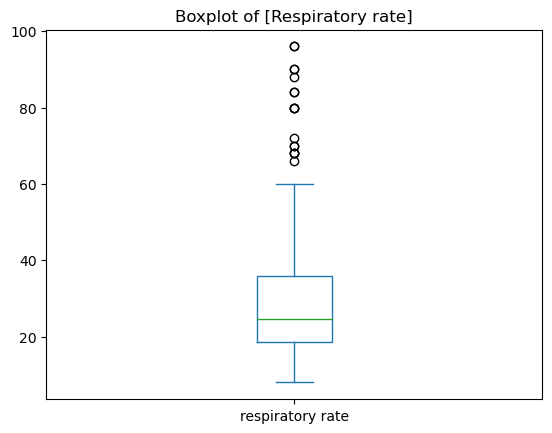

In [866]:
# посмотреть на выбросы
df_horses['respiratory rate'].plot(kind='box', title='Boxplot of [Respiratory rate]')

In [533]:
#  6:  respiratory rate
#           - linear
#           - normal rate is 8 to 10
#           - usefulness is doubtful due to the great fluctuations

In [868]:
# распределение не нормальное, применение не оправдано (много значений исключается)
rr_outlierlees = outlierless(df_linear, 'respiratory rate')

<AxesSubplot:title={'center':'Boxplot of [Respiratory rate] without outliers'}>

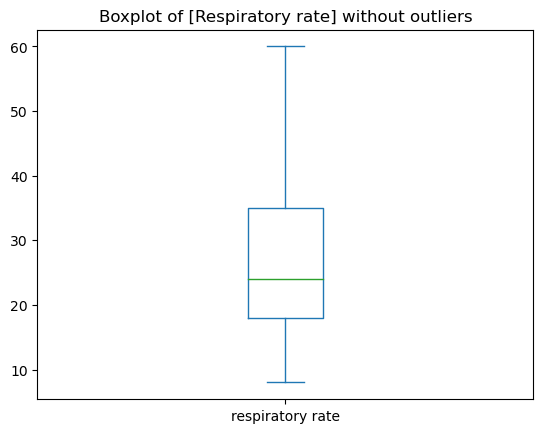

In [869]:
# выбросы исключены
rr_outlierlees['respiratory rate'].plot(kind='box', 
                                        title='Boxplot of [Respiratory rate] without outliers')

In [843]:
pd.concat([df_linear['respiratory rate'].describe(), rr_outlierlees['respiratory rate'].describe()], axis=1).T

,count,mean,std,min,25%,50%,75%,max
respiratory rate,242.0,30.417355,17.642231,8.0,18.5,24.5,36.0,96.0
respiratory rate,225.0,26.715556,11.461464,8.0,18.0,24.0,35.0,60.0


# category

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

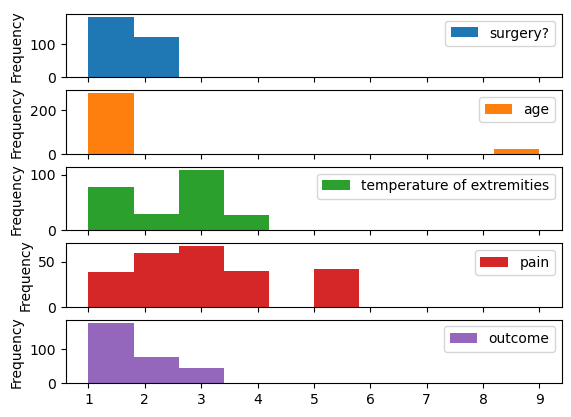

In [870]:
df_horses[["surgery?", 
           "age", 
           "temperature of extremities", 
           "pain", 
           "outcome"]]\
                       .plot(kind='hist', 
                             subplots=True)

<AxesSubplot:title={'center':'Hist of [surgery?]'}>

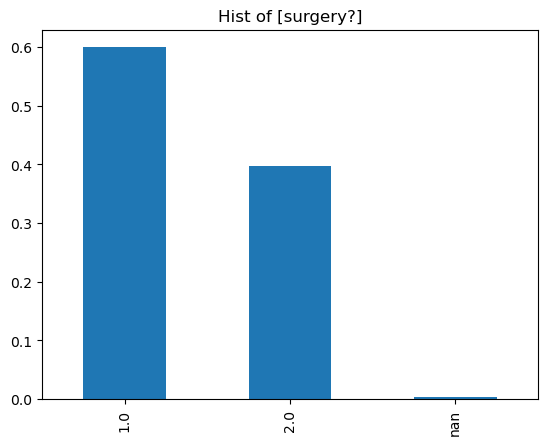

In [871]:
#частотное распределение
df_horses["surgery?"]\
                        .value_counts(normalize=True, dropna=False)\
                        .plot(kind='bar', title='Hist of [surgery?]')

In [283]:
#  1:  surgery?
#           1 = Yes, it had surgery
#           2 = It was treated without surgery

In [ ]:
# 180 (0.60) - Yes, it had surgery
# 119 (0.39) - It was treated without surgery
# 1 (0.003) - Outlier  
#  один пропуск, будет заменен на mode()

<AxesSubplot:title={'center':'Hist of [outcome]'}>

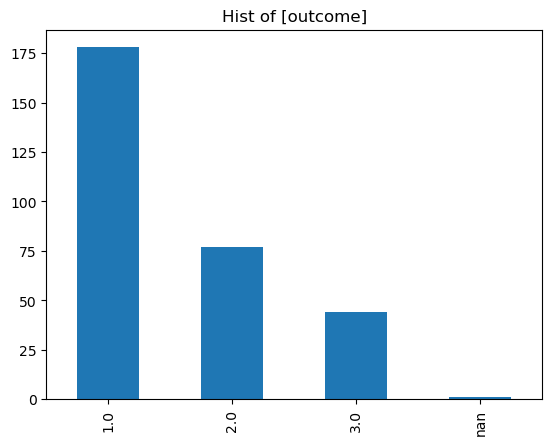

In [427]:
# частотное распределение
df_horses["outcome"]\
                    .value_counts(normalize=False, dropna=False)\
                    .sort_index()\
                    .plot(kind='bar', title='Hist of [outcome]')

In [ ]:
# 178 (0.59) - lived
# 77 (0.25) - died
# 44 (0.14) - was euthanized
# 1 (0.003) - Outliers
#  один пропуск, будет заменен на mode()

<AxesSubplot:title={'center':'Hist of [age]'}>

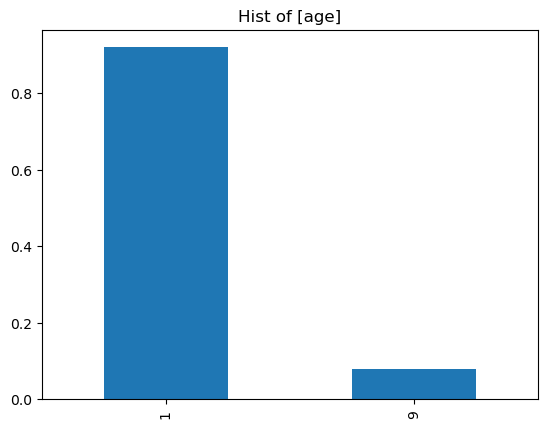

In [408]:
# частотное распределение
df_horses["age"]\
                .value_counts(normalize=True, dropna=False)\
                .plot(kind='bar', title='Hist of [age]')

In [ ]:
#  2:  Age
#           1 = Adult horse
#           2 = Young (< 6 months)

In [ ]:
# 276 (0.92) - Adult horse
# 24 (0.08)  - В описании указано значение "2" для "Young (< 6 months)". 
# В данных встречаются значения 1 и 9, что не соответстсвует файлу описания. 
# Так как значение "2" в датасете не встречается вообще, то можно предположить,
# что "9" ошибочно использовалось для маркировки молодых (<6 months) лошадей.
# Ниже будет произведена замена 9 на 2

<AxesSubplot:title={'center':'Hist of [temperature of extremities]'}>

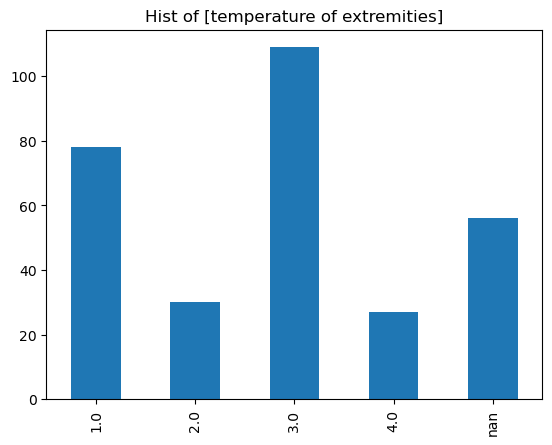

In [409]:
# частотное распределение
df_horses["temperature of extremities"]\
        .value_counts(normalize=False, dropna=False)\
        .sort_index(ascending=True)\
        .plot(kind='bar', title='Hist of [temperature of extremities]')

In [410]:
# 7:  temperature of extremities
#           - a subjective indication of peripheral circulation
#           - possible values:
#                1 = Normal
#                2 = Warm
#                3 = Cool
#                4 = Cold
#           - cool to cold extremities indicate possible shock
#           - hot extremities should correlate with an elevated rectal temp.

In [ ]:
# 78 (0.26) - Normal
# 30 (0.10) - Warm
# 109 (0.36) - Cool
# 27 (0.09) - Cold
# 56 (0.18) - Outliers

<AxesSubplot:title={'center':'Hist of [pain]'}>

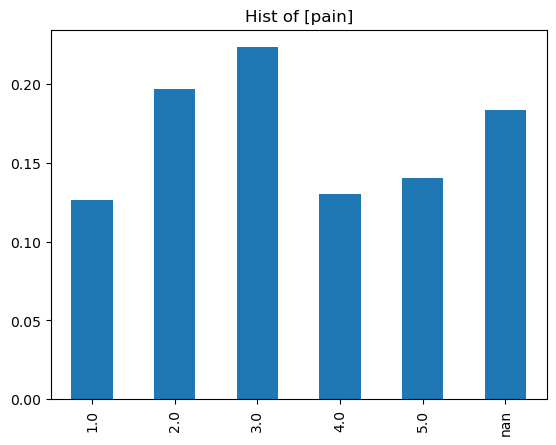

In [428]:
# частотное распределение
df_horses["pain"]\
                .value_counts(normalize=True, dropna=False)\
                .sort_index()\
                .plot(kind='bar', title='Hist of [pain]')

In [198]:
#  11: pain 
#           - a subjective judgement of the horse's pain level
#             - possible values:
#                1 = alert, no pain
#                2 = depressed
#                3 = intermittent mild pain
#                4 = intermittent severe pain
#                5 = continuous severe pain
#           - should NOT be treated as a ordered or discrete variable!
#           - In general, the more painful, the more likely it is to require
#             surgery
#           - prior treatment of pain may mask the pain level to some extent

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 50)

In [ ]:
# 38 (0.13) - alert, no pain
# 59 (0.20) - depressed
# 67 (0.22) - intermittent mild pain
# 39 (0.13) - intermittent severe pain
# 42 (0.14) - continuous severe pain
# 55 (0.18) - Outliers

### Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

План по заполнению/удалению пропусков:
* удаление всех строк, где одновременно в пяти категориях NaN
* surgery, outcome - замена NaN на моду
* age - замена 9 <--> 2
* rectal temperature/pulse/respiratory rate - замена NaN на mean/median/median
* выбор значения для заполнения NaN в оставшихся двух столбцах. Заполнение выбранным.

In [1009]:
# обновить данные из файла
df_horses = pd.read_csv('horse_data.csv', #файл в корне Jupyter Root
                        header=None, #заголовков нет
                        names=columns_all, #названия всех колонок
                        usecols=columns_required, #используемые колонки
                        na_values='?', #замена "?" на NaN
                        )

<AxesSubplot:>

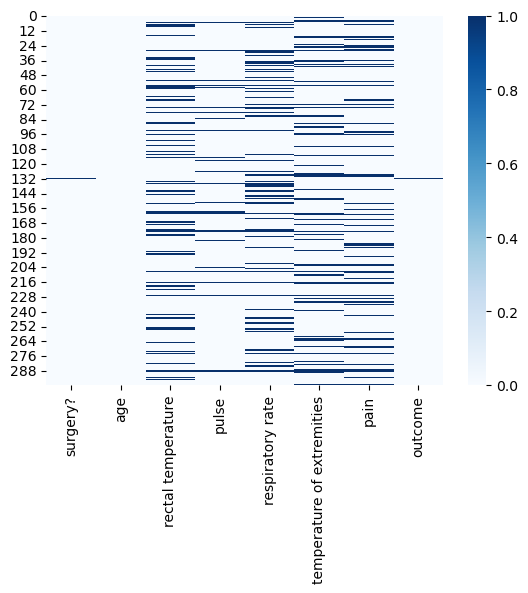

In [1010]:
#посмотреть на пропуски
sns.heatmap(df_horses.isnull(), cmap='Blues')   

In [970]:
# исключение строк, в которых все основные пять категорий == NaN
df_horses = df_horses[~df_horses['rectal temperature'].isnull() |\
                     ~df_horses['pulse'].isnull() |\
                     ~df_horses['respiratory rate'].isnull() |\
                     ~df_horses['temperature of extremities'].isnull() |\
                     ~df_horses['pain'].isnull()]

In [1011]:
# короткий вариант, как исключить строки, в которых пять категорий == NaN,
# правда здесь могут быть и другие комбинации категорий, удаление происходит
# по количеству
df_horses.dropna(thresh=4, inplace=True)


In [1012]:
# замена NaN на моду
df_horses['surgery?'].fillna(df_horses['surgery?'].mode().squeeze(), inplace = True)
df_horses['outcome'].fillna(df_horses['outcome'].mode().squeeze(), inplace = True)

In [1013]:
# замена  9 <--> 2 в столбце 'age'
df_horses['age'].replace(to_replace=9, value=2, inplace = True)
df_horses[df_horses['age'] == 9].sum()['age']  #проверка

0.0

In [1014]:
#словарь с данными для заполнения по схеме "столбец": значение для замены
fill_dict = {
   'rectal temperature': df_horses.loc[:, 'rectal temperature'].mean(),
   'pulse': df_horses.loc[:, 'pulse'].median(),
   'respiratory rate': df_horses.loc[:, 'respiratory rate'].median() 
}

In [1015]:
# заполнение NaN
df_horses.fillna(fill_dict, inplace=True)

In [ ]:
# Осталось заполнить пропуски в temperature of extremities/pain
# Посмотрим на сгруппированные данные

In [ ]:
# по интервалам температуры

In [1042]:
df_horses['rectal_bins'] = pd.cut(df_horses['rectal temperature'], 5)

In [1048]:
df_horses.groupby('rectal_bins').median()

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
rectal_bins,,,,,,,,
"(35.395, 36.48]",1.5,1.0,36.050000,93.0,27.25,3.0,3.5,2.5
"(36.48, 37.56]",1.0,1.0,37.300000,56.0,24.25,3.0,3.0,1.0
"(37.56, 38.64]",1.0,1.0,38.167917,64.0,24.50,3.0,3.0,1.0
"(38.64, 39.72]",1.0,1.0,39.000000,80.0,32.00,3.0,3.0,1.0
"(39.72, 40.8]",2.0,1.0,40.300000,78.0,36.00,3.0,2.0,2.0


In [1049]:
df_horses.groupby('rectal_bins').mean().round(1)

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
rectal_bins,,,,,,,,
"(35.395, 36.48]",1.5,1.0,36.0,92.0,28.4,3.0,3.5,2.5
"(36.48, 37.56]",1.4,1.0,37.2,62.5,25.5,2.4,2.9,1.7
"(37.56, 38.64]",1.4,1.1,38.2,69.2,27.7,2.4,3.0,1.5
"(38.64, 39.72]",1.4,1.2,39.1,86.7,40.2,2.7,2.9,1.6
"(39.72, 40.8]",1.6,1.0,40.3,90.0,39.7,2.6,2.6,2.0


In [1058]:
df_horses.drop('rectal_bins', axis=1, inplace=True, errors='ignore')

In [982]:
# по исходу

In [1050]:
df_horses.groupby('outcome').median()

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain
outcome,,,,,,,
1.0,1.0,1.0,38.167917,55.0,24.5,2.0,3.0
2.0,1.0,1.0,38.167917,84.0,24.5,3.0,4.0
3.0,1.0,1.0,38.167917,81.0,24.5,3.0,3.0


In [1051]:
df_horses.groupby('outcome').mean().round(1)

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain
outcome,,,,,,,
1.0,1.5,1.1,38.2,63.4,28.5,2.2,2.6
2.0,1.3,1.1,38.2,84.7,31.2,2.8,3.6
3.0,1.4,1.0,38.1,81.3,29.9,3.0,3.2


In [ ]:
# оперировали или нет

In [1052]:
df_horses.groupby('surgery?').median()

,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
surgery?,,,,,,,
1.0,1.0,38.167917,68.0,24.5,3.0,3.0,1.0
2.0,1.0,38.167917,56.0,24.5,3.0,3.0,1.0


In [1053]:
df_horses.groupby('surgery?').mean().round(1)

,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
surgery?,,,,,,,
1.0,1.1,38.1,75.6,31.8,2.6,3.2,1.6
2.0,1.1,38.2,65.4,25.8,2.3,2.5,1.4


In [ ]:
# заполняем оставшиеся два столбца значениями mode()

In [1054]:
fill_dict_2 = {
    'temperature of extremities': 3.0,#df_horses.loc[:, 'temperature of extremities'].mode(),
    'pain': 3.0#df_horses.loc[:, 'pain'].mode()
}

In [1055]:
df_horses.fillna(fill_dict_2, inplace=True)

In [1059]:
df_horses.isnull().sum()

surgery?                      0
age                           0
rectal temperature            0
pulse                         0
respiratory rate              0
temperature of extremities    0
pain                          0
outcome                       0
dtype: int64

In [1060]:
df_horses

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.500000,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.200000,88.0,20.0,3.0,3.0,3.0
2,2.0,1,38.300000,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.100000,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.300000,104.0,35.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,38.167917,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.200000,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.500000,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.500000,100.0,24.0,3.0,3.0,1.0
